# Imports

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib
import sklearn, umap
import hypercluster as hc
sns.set(style = 'white', color_codes=True, font_scale = 1.3)
matplotlib.rcParams.update({'savefig.bbox': 'tight', 'savefig.dpi': '500'})

### Input data and filtering

In [66]:
data = pd.read_csv('TCGA_2012_BRCA_data_expression_median_top500_most_variable.txt', sep='\t', index_col=0).transpose()

In [67]:
data.shape

(526, 500)

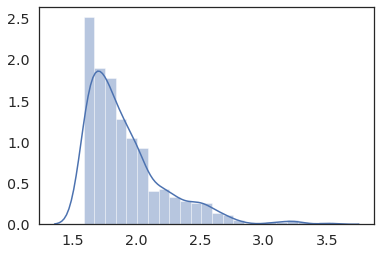

In [69]:
sns.distplot(data.std())

In [70]:
data = hc.visualize.zscore(data.transpose()).transpose()

# Running with default hyperparameters

In [7]:
custom_metrics = [
    'largest_cluster_size',
    'number_clustered',
    'number_of_clusters',
    'smallest_cluster_ratio',
    'smallest_cluster_size',
    'smallest_largest_clusters_ratio'
]

clusterer = hc.MultiAutoClusterer().fit(data).evaluate(evaluation_methods=hc.constants.inherent_metrics+custom_metrics)

ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 16 does not have at least two clusters, skipping
ERROR:root:Condition 4 does not have at least two clusters, skipping
ERROR:root:Condition 

#### Visualize evaluations

Text(0.5, -27.5, 'cluster_all')

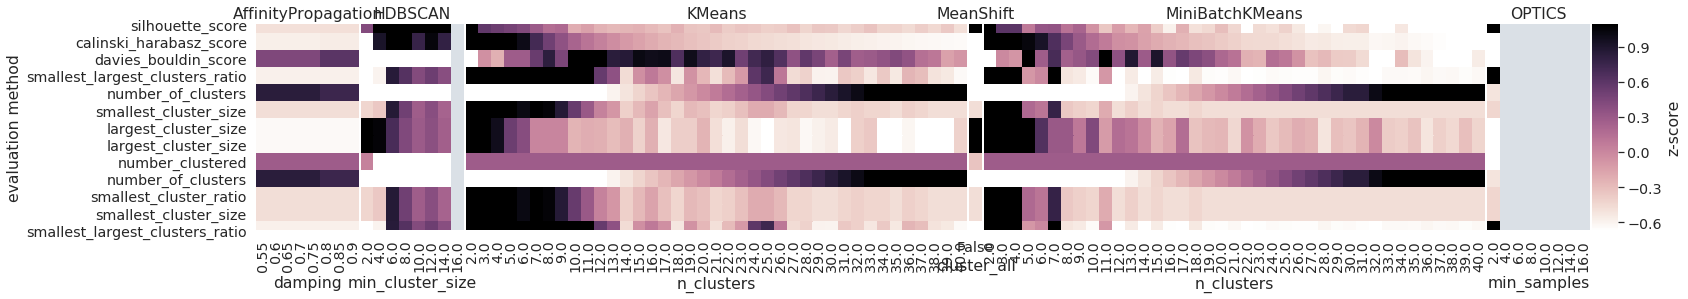

In [12]:
axs = clusterer.visualize_evaluations()

#Can modify axs before saving. 
axs[3].set_xlabel('cluster_all', va='top')

#### Filter and choose results

In [18]:
all_clustered = clusterer.pick_best_labels(method='number_clustered', min_or_max='max')

In [21]:
best_labels = hc.utilities.pick_best_labels(clusterer.evaluation_df.reindex(all_clustered.columns, axis=1), all_clustered, method='silhouette_score', min_or_max='max')

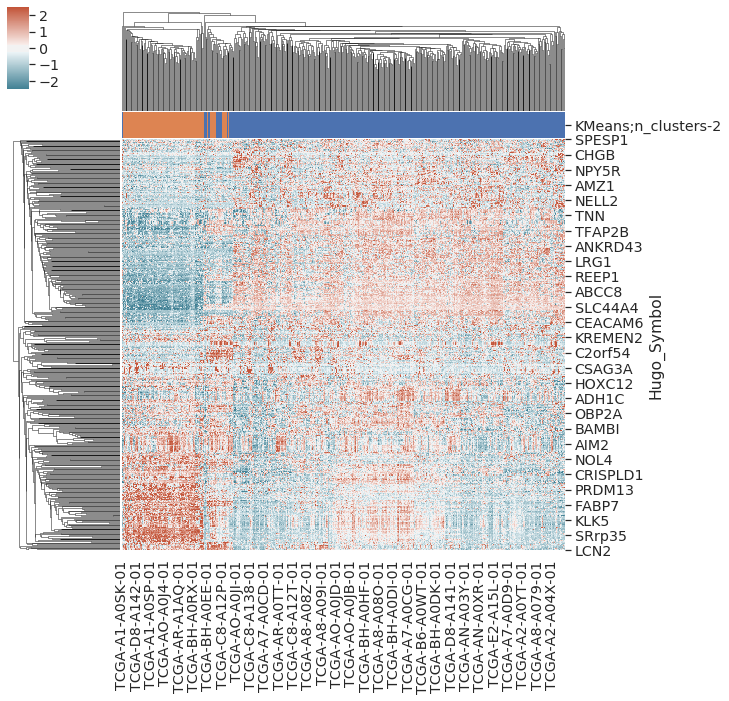

In [31]:
col_colors = best_labels.replace({clus: sns.color_palette().as_hex()[i] for i, clus in enumerate(best_labels[best_labels.columns[0]].unique())})

sns.clustermap(hc.visualize.zscore(data.transpose()), col_colors=col_colors, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), vmin=-2.5, vmax=2.5)

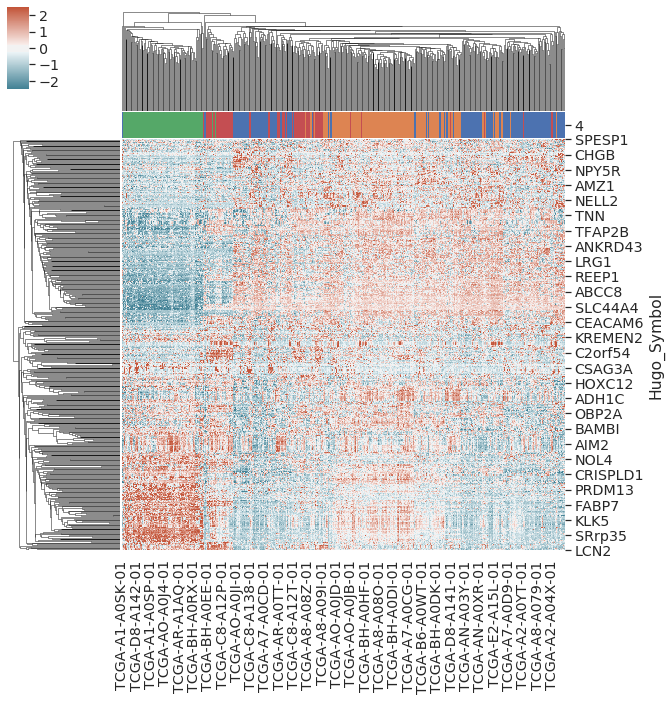

In [55]:
four_cluster_labels = clusterer.labels_['KMeans'][4]

col_colors = four_cluster_labels.replace({clus: sns.color_palette().as_hex()[i] for i, clus in enumerate(four_cluster_labels.unique())})
sns.clustermap(hc.visualize.zscore(data.transpose()), col_colors=col_colors, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), vmin=-2.5, vmax=2.5)

#### Comparing to a gold standard

In [56]:
patient_annotation = pd.read_csv('data_clinical_sample.txt', sep='\t', index_col=0, skiprows=4)

In [57]:
pam50_subtype = patient_annotation['PAM50_SUBTYPE'].dropna()
four_cluster_labels = four_cluster_labels.reindex(pam50_subtype.index.intersection(four_cluster_labels.index))

In [59]:
hc.utilities.evaluate_one(four_cluster_labels, 'adjusted_rand_score', gold_standard=pam50_subtype)

0.44129167708444333

# Choosing custom hyperparameters to optimize

# Adding probability weights to each parameter for random search

# Predicting on new data